In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/supermarket_sales.csv'
dataset = pd.read_csv(data_path)
dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
dataset.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
dataset.size

17000

In [ ]:
dataset.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
dataset.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

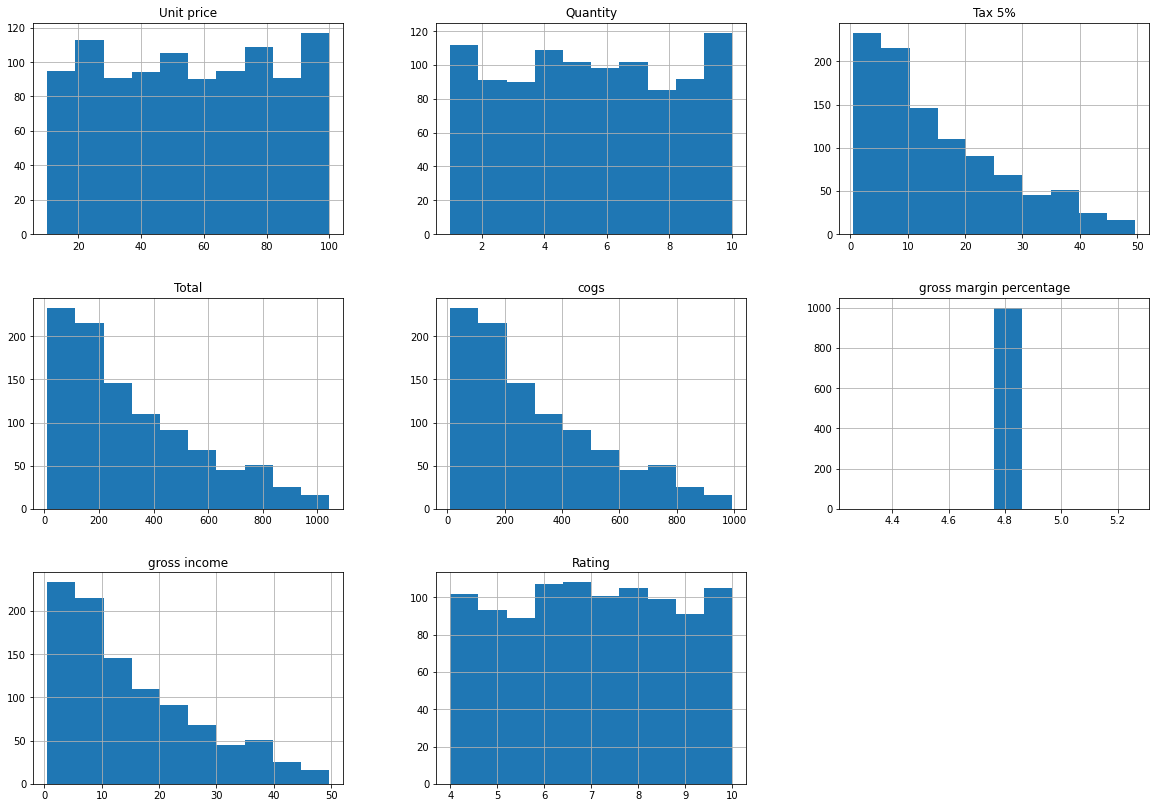

In [ ]:
dataset.hist(figsize= (20,14))
plt.show()

In [ ]:
dataset.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


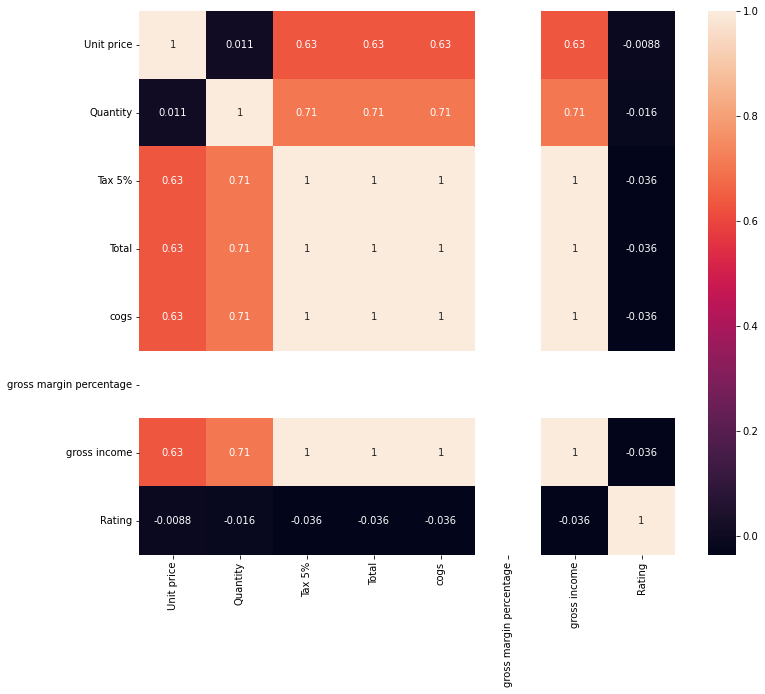

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(dataset.corr(), annot= True)

#Data Visualization


In [ ]:
dataset['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

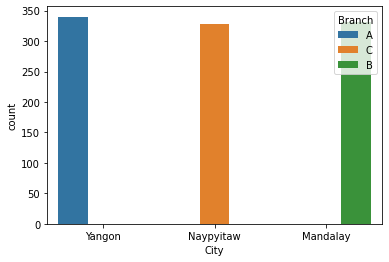

In [ ]:
sns.countplot(x="City", hue="Branch", data=dataset)

In [ ]:
dataset['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [ ]:
dataset['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

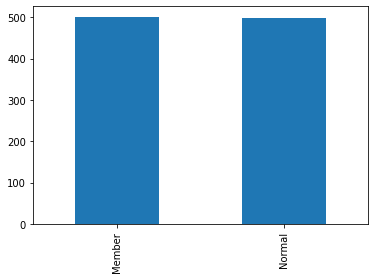

In [ ]:
dataset['Customer type'].value_counts().plot.bar()

In [ ]:
dataset['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

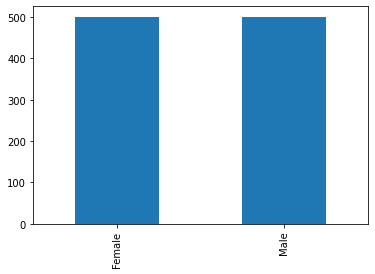

In [ ]:
dataset['Gender'].value_counts().plot.bar()

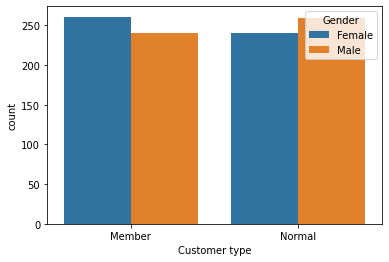

In [ ]:
sns.countplot(x="Customer type",hue="Gender",data=dataset)

In [ ]:
dataset['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

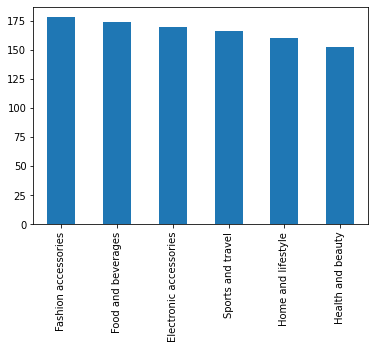

In [ ]:
dataset['Product line'].value_counts().plot.bar()

Transformando la DATA

Transformando Variables Categoricas

In [ ]:
Customer_type = pd.get_dummies(dataset['Customer type'], drop_first = True)
Customer_type 


,Normal
0,0
1,1
2,1
3,0
4,1
...,...
995,1
996,1
997,0
998,1


In [ ]:
payment = pd.get_dummies(dataset['Payment'], drop_first = True)
payment

,Credit card,Ewallet
0,0,1
1,0,0
2,1,0
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,0,0
998,0,0


In [ ]:
Gender=pd.get_dummies(dataset['Gender'],drop_first=True)
Gender

,Male
0,0
1,0
2,1
3,1
4,1
...,...
995,1
996,0
997,1
998,1


In [ ]:
Product=pd.get_dummies(dataset['Product line'],drop_first=True)
Product

,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
995,0,0,1,0,0
996,0,0,0,1,0
997,0,1,0,0,0
998,0,0,0,1,0


In [ ]:
dataset2=pd.concat([dataset,Gender,Product,Customer_type,payment],axis=1)
dataset2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Normal,Credit card,Ewallet
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,9.1,0,0,0,1,0,0,0,0,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,9.6,0,0,0,0,0,0,1,0,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,7.4,1,0,0,0,1,0,1,1,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,8.4,1,0,0,1,0,0,0,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,5.3,1,0,0,0,0,1,1,0,1


In [ ]:
y = dataset2['Quantity']
y.head()

0    7
1    5
2    7
3    8
4    7
Name: Quantity, dtype: int64

In [ ]:
dataset2.drop(['City', 'Quantity','Branch','Gender','Customer type','Product line','Invoice ID', 'Payment','Date','Time'],axis=1,inplace=True)
dataset2

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Normal,Credit card,Ewallet
0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,0,0,1,0,0,0,0,1
1,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,0,0,0,0,0,1,0,0
2,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4,1,0,0,0,1,0,1,1,0
3,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4,1,0,0,1,0,0,0,0,1
4,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,2.0175,42.3675,40.35,4.761905,2.0175,6.2,1,0,0,1,0,0,1,0,1
996,97.38,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,0,0,0,0,1,0,1,0,1
997,31.84,1.5920,33.4320,31.84,4.761905,1.5920,7.7,1,0,1,0,0,0,0,0,0
998,65.82,3.2910,69.1110,65.82,4.761905,3.2910,4.1,1,0,0,0,1,0,1,0,0


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unit price               1000 non-null   float64
 1   Tax 5%                   1000 non-null   float64
 2   Total                    1000 non-null   float64
 3   cogs                     1000 non-null   float64
 4   gross margin percentage  1000 non-null   float64
 5   gross income             1000 non-null   float64
 6   Rating                   1000 non-null   float64
 7   Male                     1000 non-null   uint8  
 8   Fashion accessories      1000 non-null   uint8  
 9   Food and beverages       1000 non-null   uint8  
 10  Health and beauty        1000 non-null   uint8  
 11  Home and lifestyle       1000 non-null   uint8  
 12  Sports and travel        1000 non-null   uint8  
 13  Normal                   1000 non-null   uint8  
 14  Credit card              

In [ ]:
X = dataset2.drop
X

<bound method DataFrame.drop of      Unit price   Tax 5%      Total    cogs  gross margin percentage  \
0         74.69  26.1415   548.9715  522.83                 4.761905   
1         15.28   3.8200    80.2200   76.40                 4.761905   
2         46.33  16.2155   340.5255  324.31                 4.761905   
3         58.22  23.2880   489.0480  465.76                 4.761905   
4         86.31  30.2085   634.3785  604.17                 4.761905   
..          ...      ...        ...     ...                      ...   
995       40.35   2.0175    42.3675   40.35                 4.761905   
996       97.38  48.6900  1022.4900  973.80                 4.761905   
997       31.84   1.5920    33.4320   31.84                 4.761905   
998       65.82   3.2910    69.1110   65.82                 4.761905   
999       88.34  30.9190   649.2990  618.38                 4.761905   

     gross income  Rating  Male  Fashion accessories  Food and beverages  \
0         26.1415     9.1  

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

ValueError: ignored

In [ ]:
#partición de data para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
X_train.shape[1]

17

In [ ]:
len(y_train.value_counts())

10

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


TypeError: ignored

In [ ]:
print('X_train, X_train.shape')
print('X_test, X_test.shape')
print('y_train, y_train.shape')
print('y_test, y_test.shape')